In [10]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,utils
import matplotlib.pyplot as plt
import torch.nn.functional as F

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=datasets.MNIST('MNIST/',transform=transform,download=True)
train_loader=DataLoader(trainset,batch_size=64,shuffle=True)



torch.Size([64, 1, 28, 28])
torch.Size([64])


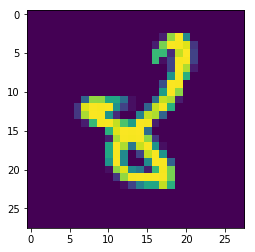

In [11]:
image,label=next(iter(train_loader))
print(image.size())
print(label.size())
plt.imshow(image[0][0,:])

In [12]:
label

tensor([ 8,  3,  0,  9,  3,  4,  8,  7,  5,  0,  4,  2,  5,  0,
         0,  7,  6,  2,  6,  9,  9,  0,  5,  3,  2,  5,  1,  9,
         7,  7,  0,  8,  3,  7,  0,  4,  0,  5,  9,  8,  0,  4,
         1,  9,  7,  5,  1,  5,  7,  8,  8,  5,  6,  5,  9,  1,
         8,  7,  1,  6,  1,  2,  8,  0])

In [13]:
class Network(torch.nn.Module):
    
    def __init__(self):
        super(Network,self).__init__()
        self.fc1=torch.nn.Linear(784,400)
#        self.dropout1=torch.nn.Dropout(p=0.2)
        self.fc2=torch.nn.Linear(400,200)
        self.dropout2=torch.nn.Dropout(p=0.2)
        self.fc3=torch.nn.Linear(200,100)
        self.fc4=torch.nn.Linear(100,10)
        #self.sigmoid=torch.nn.Sigmoid()
        
        
    def forward(self,x):
        
        out1=F.relu(self.fc1(x))
#        out1=self.dropout1(out1)
        out2=F.relu(self.fc2(out1))
        out2=self.dropout2(out2)
        out3=F.relu(self.fc3(out2))
        out4=self.fc4(out3)   #sof max at end, or sigmoid all the way did not work out
        #y_pred=F.softmax(out4,dim=1)   #if don't need probability as out put not necessary output4 is batch_size*10
        y_pred=out4
        return y_pred

model=Network()    
    

In [14]:
epochs=5
criterion=torch.nn.CrossEntropyLoss()  #if increase the lr to 0.1, it kicks to local min and stays
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)  #had to change from SGD to Adam but later noy much difference
lr_scheduler_=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
#lr_scheduler_=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=epochs)

In [15]:
#torch.set_printoptions(precision=2)

loss_running=0
count=0
count_batch=0
sum_acc=0

for epoch in range(epochs):

    for input,label in iter(train_loader):
        
        input.resize_(input.size()[0], 784)
        y_pred=model(input)   #this is 64 (bacth_size)*10

        if(count==0): print(y_pred.size(),label.size())
        loss=criterion(y_pred,label)    #criterion(y_pred,label), crossentropy criterion need long (output of forward) and normal tensor (target)
        loss_running=loss_running+loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count=count+1
        #y_pred_round=torch.round(y_pred)
        count_batch=count_batch+(label.size()[0])
        _,y_pred_=torch.max(y_pred,dim=1)    #argmax is the second value returned by torch.max()  ,this collapse dimension to batch size with argmax of probabililty/value (second) item, first one is the value itself 
          
        acc=(label==y_pred_).sum().item()    #/label.size()[0]
        sum_acc=sum_acc+acc
        if(count%200==0): print('epoch',epoch,'/',epochs,'running_loss:',(loss_running/count_batch),'Accuracy',(sum_acc*100/count_batch))
 
    check_loss=(loss_running/count_batch)
    lr_scheduler_.step(check_loss)
   
    

torch.Size([64, 10]) torch.Size([64])
epoch 0 / 5 running_loss: 0.015094327405095101 Accuracy 67.7421875
epoch 0 / 5 running_loss: 0.011576089932932519 Accuracy 76.3046875
epoch 0 / 5 running_loss: 0.009917514342038582 Accuracy 80.3125
epoch 0 / 5 running_loss: 0.00890630728637916 Accuracy 82.60546875
epoch 1 / 5 running_loss: 0.008342256498271007 Accuracy 83.94040770385193
epoch 1 / 5 running_loss: 0.007814020267736265 Accuracy 85.12531263026261
epoch 1 / 5 running_loss: 0.007468995363686118 Accuracy 85.90679707038228
epoch 1 / 5 running_loss: 0.007160702638477134 Accuracy 86.58369803063458
epoch 1 / 5 running_loss: 0.006984099763152884 Accuracy 86.98683662128369
epoch 2 / 5 running_loss: 0.006811869095544098 Accuracy 87.37259254627314
epoch 2 / 5 running_loss: 0.006598662807950907 Accuracy 87.79701000454752
epoch 2 / 5 running_loss: 0.006453410183014903 Accuracy 88.12135264693622
epoch 2 / 5 running_loss: 0.006350083104111706 Accuracy 88.36150923432089
epoch 2 / 5 running_loss: 0.006